### 追蹤誤差  
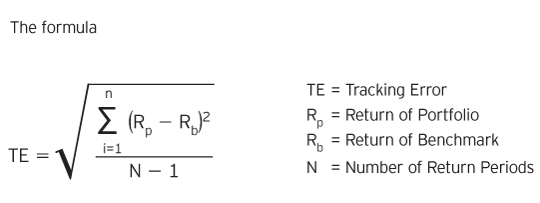

In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
from pandas_datareader import data
from datetime import datetime
import numpy as np
import mpl_finance as mpf

stocklist = ['QQQ','ONEQ','IBB','QTEC']
start = datetime(2014,4,30)
end = datetime(2019,5,1)
df1 = data.DataReader('^NDX','yahoo', start, end)
df2 = data.DataReader(stocklist, 'iex', start, end)

#df = pd.merge(df1,df2,left_index=True, right_index=True)
#df.head()
df1.to_csv('ndx.csv',na_rep='NA') #data for tracking error
df2.to_csv('ndx_etf.csv')
df2.head()

Attributes     open                                 high                     \
Symbols         IBB      ONEQ      QQQ     QTEC      IBB      ONEQ      QQQ   
date                                                                          
2014-05-01  75.9608  153.4566  83.3246  34.6395  77.6264  154.7146  83.9148   
2014-05-02  76.9357  153.7226  83.7149  34.7911  77.0205  154.3687  83.8767   
2014-05-05  74.7018  152.6014  82.8010  34.5731  77.0910  154.1375  83.7434   
2014-05-06  76.8432  154.3308  83.6102  34.8006  77.1935  154.3308  83.6387   
2014-05-07  76.0963  152.1358  82.8200  34.4783  76.1162  152.1358  82.8962   

Attributes               low                                close            \
Symbols        QTEC      IBB      ONEQ      QQQ     QTEC      IBB      ONEQ   
date                                                                          
2014-05-01  34.9806  75.3924  153.3236  83.1152  34.5921  76.8333  153.5421   
2014-05-02  34.8764  75.2470  153.4662  83.0866  34.6281  75.6932  153.6086   
2014-05-05  34.7532  74.4671  152.1721  82.5916  34.4119  77.0910  154.1375   
2014-05-06  34.8006  75.6568  152.2023  82.6011  34.4499  75.7857  152.3259   
2014-05-07  34.4783  73.6938  150.1309  81.4207  33.9097  75.1743  151.8602   

Attributes                     volume                          
Symbols         QQQ     QTEC      IBB   ONEQ       QQQ   QTEC  
date                                                           
2014-05-01  83.4388  34.6755  4356666   5920  37127219  78921  
2014-05-02  83.2865  34.7248  5515809   6878  40074150  19523  
2014-05-05  83.7244  34.7532  4199523   9995  27924376  12701  
2014-05-06  82.6392  34.4499  3311736   6117  33698549   7609  
2014-05-07  82.4012  34.1751  4582014  15338  67489143  49383

In [10]:
dft0 = data.DataReader('^NBI','yahoo', start, end)
#print(dft0)

dft1 = data.DataReader('^DJUSTC','yahoo', start, end)
print(dft1)

                   High          Low         Open        Close     Volume  \
Date                                                                        
2019-05-01  2115.050049  2103.800049  2113.560059  2107.399902  315238729   

              Adj Close  
Date                     
2019-05-01  2107.399902  


In [149]:
d2 = df2['close'].pct_change()

d1 = df1['Close'].pct_change()
d1 = d1.drop(d1.index[:2])

d2['NDX'] = d1[0:]

for i in stocklist:
    d2[i+'e'] = d2[i] - d2['NDX']
print(d2)

Symbols          IBB      ONEQ       QQQ      QTEC       NDX      QQQe  \
date                                                                     
2014-05-01       NaN       NaN       NaN       NaN  0.003445       NaN   
2014-05-02 -0.014839  0.000433 -0.001825  0.001422 -0.001870  0.000044   
2014-05-05  0.018467  0.003443  0.005258  0.000818  0.004864  0.000394   
2014-05-06 -0.016932 -0.011753 -0.012962 -0.008727 -0.013475  0.000514   
2014-05-07 -0.008067 -0.003057 -0.002880 -0.007977 -0.002823 -0.000057   
2014-05-08 -0.018155 -0.004255 -0.000925  0.003605 -0.001706  0.000781   
2014-05-09  0.013834  0.002828  0.003701  0.002764  0.004316 -0.000615   
2014-05-12  0.024201  0.018109  0.016475  0.019013  0.016039  0.000436   
2014-05-13 -0.006080 -0.001539  0.000680 -0.003786 -0.000443  0.001123   
2014-05-14  0.003905 -0.008444 -0.005210 -0.002864 -0.004951 -0.000259   
2014-05-15 -0.011280 -0.005657 -0.007913 -0.006110 -0.007815 -0.000098   
2014-05-16 -0.002185  0.003188  0.0065

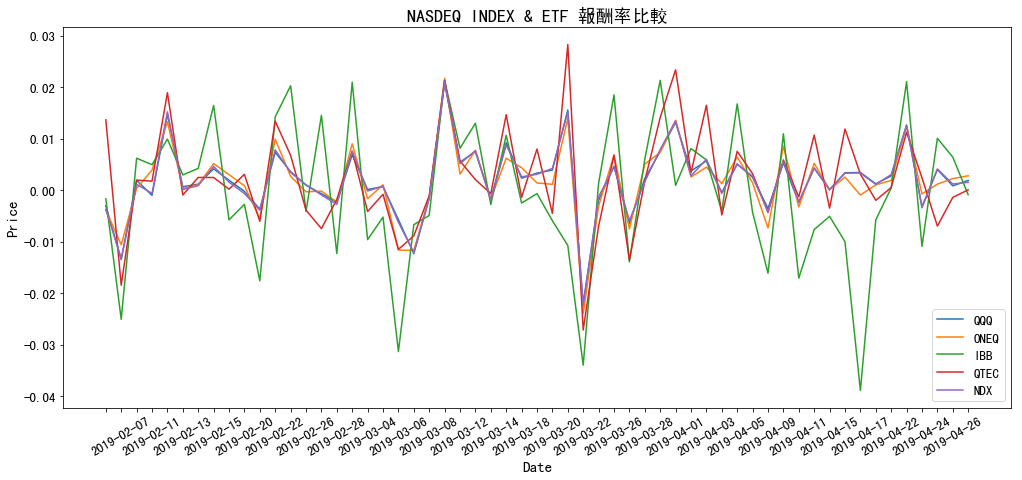

In [183]:
plt.rcParams['font.sans-serif'] = ['simhei'] #set chinese word font
plt.rcParams['axes.unicode_minus']=False #show minus

fig = plt.figure(figsize=(17, 7))
plt.title('NASDEQ INDEX & ETF 報酬率比較',fontsize=18)

#set label
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price',fontsize=15)

#set xticks interval so they won't overlap
plt.xticks(rotation=30)
ax = plt.gca()
plt.xticks(np.arange(57))

for ind, label in enumerate(ax.xaxis.get_ticklabels()):
    if ind % 2 == 1:  # set the interval of the xticks
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.plot(d2['QQQ'][1200:1257],label='QQQ')
plt.plot(d2['ONEQ'][1200:1257],label='ONEQ')
plt.plot(d2['IBB'][1200:1257],label='IBB')
plt.plot(d2['QTEC'][1200:1257],label='QTEC')
plt.plot(d2['NDX'][1200:1257],label='NDX')
plt.legend(loc=4,prop={'size':13})

0.0004921679132635717


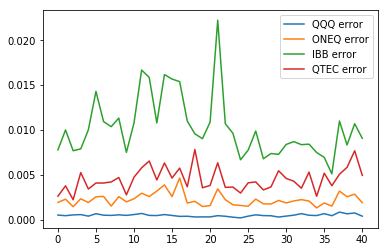

In [150]:
t = np.std(d2['QQQe'])
print(t)
d2['QQQe'][0:30]
QQQe = []
ONEQe = []
IBBe = []
QTECe = []
error = [QQQe,ONEQe,IBBe,QTECe]
for i in stocklist:
    for k in range(len(d2[i+'e'])//30):
        error[(stocklist.index(i))].append(np.std(d2[i+'e'][k*30:(k*30)+30]))
#print(error)
plt.plot(QQQe,label='QQQ error')
plt.plot(ONEQe,label='ONEQ error')
plt.plot(IBBe,label='IBB error')
plt.plot(QTECe,label='QTEC error')
plt.legend()